<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

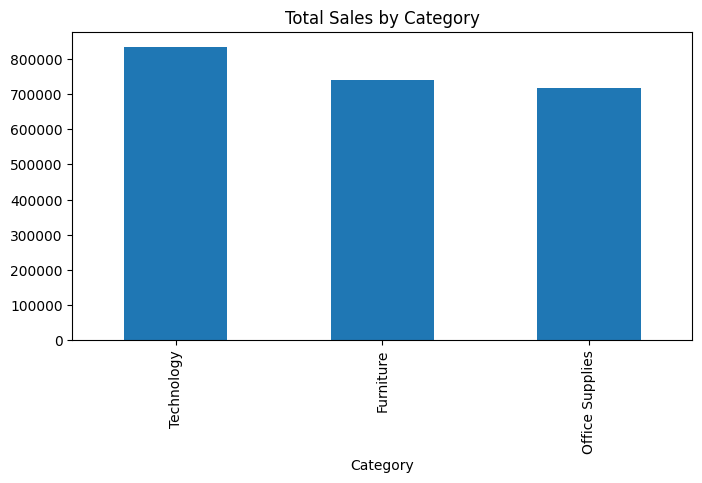

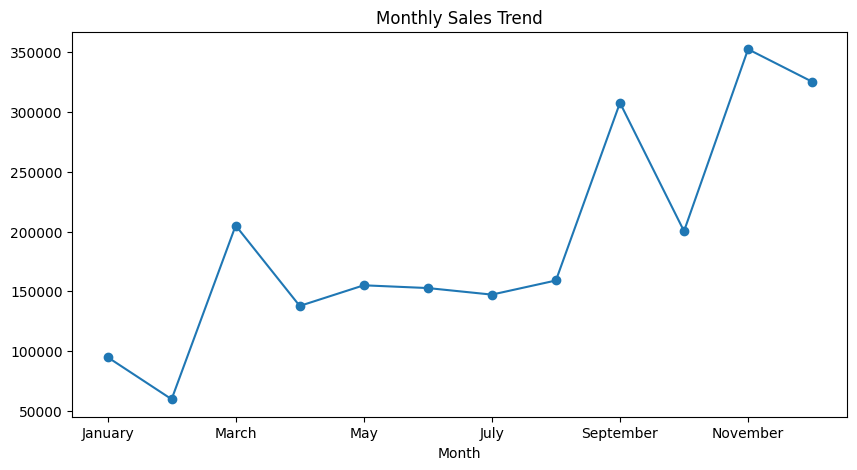

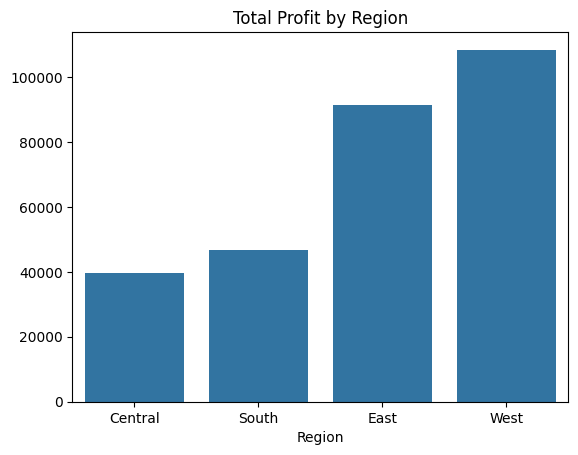

Highest Sales Category: Technology
Most Profitable Region: West


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('data/Sample - Superstore.csv', encoding='latin1')
df.head()

# Basic info
print(df.info())
print(df.describe())

# Data Cleaning
df.drop_duplicates(inplace=True)
df.dropna(subset=['Sales', 'Profit'], inplace=True)

# Add Month and Year columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month_name()
df['Year'] = df['Order Date'].dt.year

# Total Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(8,4), title='Total Sales by Category')
plt.savefig('visuals/category_sales.png')
plt.show()

# Monthly Sales Trend
monthly_sales = df.groupby('Month')['Sales'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
monthly_sales.plot(kind='line', marker='o', figsize=(10,5), title='Monthly Sales Trend')
plt.savefig('visuals/monthly_sales.png')
plt.show()

# Profit by Region
region_profit = df.groupby('Region')['Profit'].sum().sort_values()
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title('Total Profit by Region')
plt.savefig('visuals/region_profit.png')
plt.show()

# Insights
print("Highest Sales Category:", category_sales.idxmax())
print("Most Profitable Region:", region_profit.idxmax())
